In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# Stochastic Methods

To better show the potential of stochastic optimizers with accelerators we perform a linear regression with his regularized version through a perceptron or single layer neural network. This problem, aka least squares problem, can be formulated as follows:

$$\min_\theta \sum_{i=1}^m(y_i - X_i^T\theta)^2$$

which change as follow if we introduce some L2 regulrization:

$$\min_{\theta_{ridge}} \sum_{i=1}^m(y_i - X_i^T\theta_{ridge})^2 + \lambda \sum_{j=1}^{n}\theta_{{ridge}_{j}}^{2}$$

In [2]:
import numpy as np

from optiml.ml.utils import generate_centred_and_normalized_regression_data

X, y = generate_centred_and_normalized_regression_data(random_state=1)

The closed solution to linear regression is:

$$\theta^* = (X^TX)^{-1} X^T Y$$

which change as follow if we introduce some L2 regularization:

$$\theta^*_{ridge} = (X^TX + \lambda I)^{-1} X^T Y$$

In [3]:
lmbda = 10

In [4]:
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

array([ 14.9704812 , -17.19468595])

In [5]:
np.linalg.inv(X.T.dot(X) + np.identity(X.shape[1]) * lmbda).dot(X.T).dot(y)

array([-0.1320119 , -0.23377374])

In [6]:
from optiml.ml.neural_network import NeuralNetworkRegressor
from optiml.ml.neural_network.layers import FullyConnected
from optiml.ml.neural_network.activations import linear
from optiml.ml.neural_network.losses import mean_squared_error
from optiml.ml.neural_network.regularizers import L2

from optiml.opti.utils import plot_trajectory_optimization
from optiml.opti.unconstrained.stochastic import *

## Stochastic Gradient Descent

epoch	iter	 cost		 gap		 rate
   0	   0	 8.8196e-02	 3.2336e-02			loss:  8.8196e-02 - r2:  0.7921
 100	 100	 6.8169e-02	 1.2310e-02	 3.8068e-01	loss:  6.8169e-02 - r2:  0.7921
 200	 200	 6.0153e-02	 4.2931e-03	 3.4875e-01	loss:  6.0153e-02 - r2:  0.7921
 300	 300	 5.7357e-02	 1.4972e-03	 3.4875e-01	loss:  5.7357e-02 - r2:  0.7921
 400	 400	 5.6382e-02	 5.2215e-04	 3.4875e-01	loss:  5.6382e-02 - r2:  0.7921
 500	 500	 5.6042e-02	 1.8210e-04	 3.4875e-01	loss:  5.6042e-02 - r2:  0.7921
 600	 600	 5.5923e-02	 6.3508e-05	 3.4875e-01	loss:  5.5923e-02 - r2:  0.7921
 700	 700	 5.5882e-02	 2.2148e-05	 3.4875e-01	loss:  5.5882e-02 - r2:  0.7921
 800	 800	 5.5867e-02	 7.7243e-06	 3.4875e-01	loss:  5.5867e-02 - r2:  0.7921
 900	 900	 5.5862e-02	 2.6939e-06	 3.4875e-01	loss:  5.5862e-02 - r2:  0.7921

[ 14.93180412 -17.15600888]


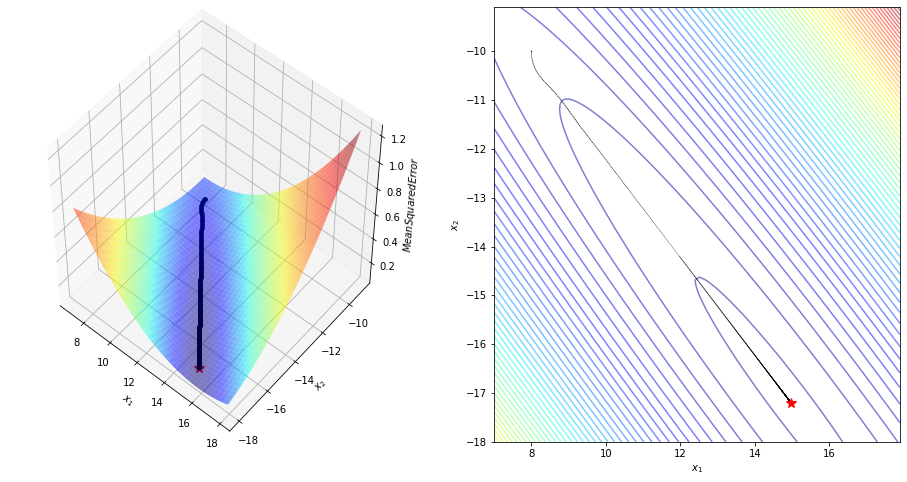

In [7]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=StochasticGradientDescent, 
                             learning_rate=0.8, momentum_type='nesterov', momentum=0.9, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=18, y_min=-18, y_max=-9)

epoch	iter	 cost		 gap		 rate
   0	   0	 1.6510e+01	 1.6249e+01			loss:  1.6510e+01 - r2:  0.0586
 100	 100	 3.9008e-01	 1.2988e-01	 7.9929e-03	loss:  3.9008e-01 - r2:  0.0586
 200	 200	 2.6126e-01	 1.0578e-03	 8.1448e-03	loss:  2.6126e-01 - r2:  0.0586
 300	 300	 2.6021e-01	 8.9527e-06	 8.4631e-03	loss:  2.6021e-01 - r2:  0.0586
 400	 400	 2.6020e-01	 8.1412e-08	 9.0936e-03	loss:  2.6020e-01 - r2:  0.0586
 500	 500	 2.6020e-01	 8.3139e-10	 1.0212e-02	loss:  2.6020e-01 - r2:  0.0586
 600	 600	 2.6020e-01	 9.8572e-12	 1.1856e-02	loss:  2.6020e-01 - r2:  0.0586
 700	 700	 2.6020e-01	 1.3511e-13	 1.3707e-02	loss:  2.6020e-01 - r2:  0.0586
 800	 800	 2.6020e-01	 1.9984e-15	 1.4790e-02	loss:  2.6020e-01 - r2:  0.0586
 900	 900	 2.6020e-01	 5.5511e-17	 2.7778e-02	loss:  2.6020e-01 - r2:  0.0586

[-0.1320119  -0.23377373]


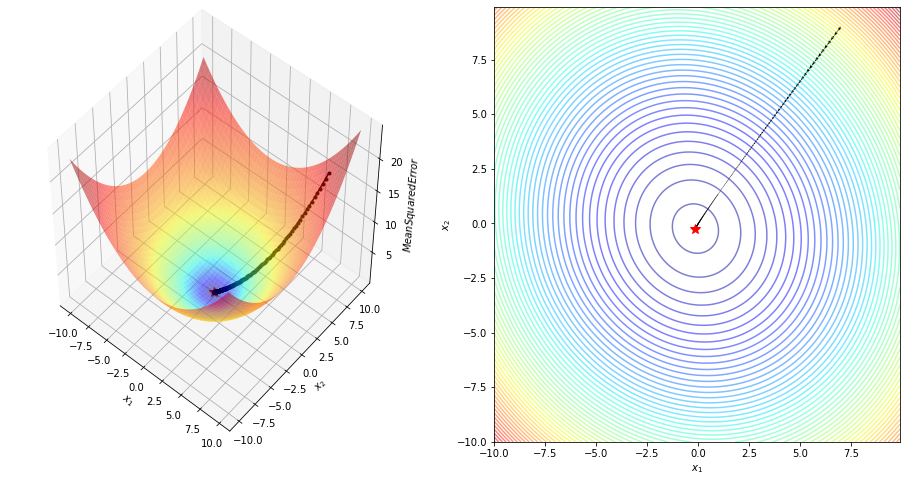

In [8]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=StochasticGradientDescent, learning_rate=0.1, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## Adam

epoch	iter	 cost		 gap		 rate
   0	   0	 8.8196e-02	 3.2336e-02			loss:  8.8196e-02 - r2:  0.7921
 100	 100	 7.0933e-02	 1.5073e-02	 4.6614e-01	loss:  7.0933e-02 - r2:  0.7921
 200	 200	 6.1864e-02	 6.0044e-03	 3.9835e-01	loss:  6.1864e-02 - r2:  0.7921
 300	 300	 5.7883e-02	 2.0234e-03	 3.3699e-01	loss:  5.7883e-02 - r2:  0.7921
 400	 400	 5.6419e-02	 5.5963e-04	 2.7658e-01	loss:  5.6419e-02 - r2:  0.7921
 500	 500	 5.5986e-02	 1.2600e-04	 2.2515e-01	loss:  5.5986e-02 - r2:  0.7921
 600	 600	 5.5886e-02	 2.6139e-05	 2.0745e-01	loss:  5.5886e-02 - r2:  0.7921
 700	 700	 5.5871e-02	 1.0753e-05	 4.1137e-01	loss:  5.5871e-02 - r2:  0.7921
 800	 800	 5.5861e-02	 1.2969e-06	 1.2061e-01	loss:  5.5861e-02 - r2:  0.7921
 900	 900	 5.5860e-02	 6.8480e-07	 5.2803e-01	loss:  5.5860e-02 - r2:  0.7921

[ 14.9677928 -17.1923092]


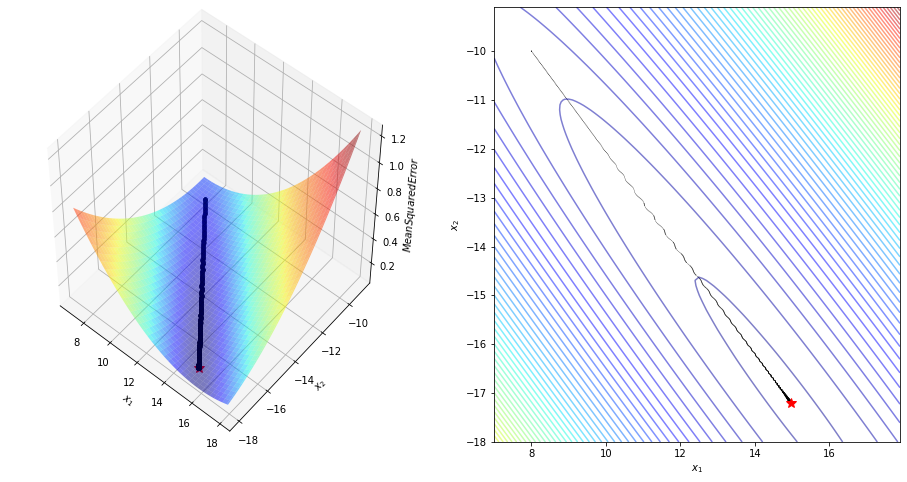

In [9]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=Adam, learning_rate=0.01, 
                             momentum_type='nesterov', momentum=0.6, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=18, y_min=-18, y_max=-9)

In [13]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=Adam, learning_rate=0.1, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

epoch	iter	 cost		 gap		 rate
   0	   0	 1.6510e+01	 1.6249e+01			loss:  1.6510e+01 - r2:  0.0586
 100	 100	 6.5736e-01	 3.9717e-01	 2.4442e-02	loss:  6.5736e-01 - r2:  0.0586
 200	 200	 2.6138e-01	 1.1769e-03	 2.9632e-03	loss:  2.6138e-01 - r2:  0.0586
 300	 300	 2.6020e-01	 9.1833e-08	 7.8032e-05	loss:  2.6020e-01 - r2:  0.0586
 400	 400	 2.6020e-01	 2.4035e-12	 2.6173e-05	loss:  2.6020e-01 - r2:  0.0586
 500	 500	 2.6020e-01	 0.0000e+00	 0.0000e+00	loss:  2.6020e-01 - r2:  0.0586
 600	 600	 2.6020e-01	-5.5511e-17	-inf	loss:  2.6020e-01 - r2:  0.0586
 700	 700	 2.6020e-01	-5.5511e-17	 1.0000e+00	loss:  2.6020e-01 - r2:  0.0586
 800	 800	 2.6020e-01	 0.0000e+00	-0.0000e+00	loss:  2.6020e-01 - r2:  0.0586

/home/donato/donato.meoli.95@gmail.com/MachineLearning&ComputationalMathematics/optiml/optiml/opti/unconstrained/stochastic/adam.py:47: RuntimeWarning: divide by zero encountered in double_scalars
  print('\t{: 1.4e}'.format((self.f_x - self.f.f_star()) / (prev_v - self.f.f_star())), end='')
/home/donato/donato.meoli.95@gmail.com/MachineLearning&ComputationalMathematics/optiml/optiml/opti/unconstrained/stochastic/adam.py:47: RuntimeWarning: invalid value encountered in double_scalars
  print('\t{: 1.4e}'.format((self.f_x - self.f.f_star()) / (prev_v - self.f.f_star())), end='')



 900	 900	 2.6020e-01	 0.0000e+00	 nan	loss:  2.6020e-01 - r2:  0.0586

[-0.1320119  -0.23377374]


## AdaMax

epoch	iter	 cost		 gap		 rate
   0	   0	 8.8196e-02	 3.2336e-02			loss:  8.8196e-02 - r2:  0.7921
 100	 100	 6.8184e-02	 1.2324e-02	 3.8113e-01	loss:  6.8184e-02 - r2:  0.7921
 200	 200	 6.0032e-02	 4.1725e-03	 3.3856e-01	loss:  6.0032e-02 - r2:  0.7921
 300	 300	 5.7108e-02	 1.2482e-03	 2.9915e-01	loss:  5.7108e-02 - r2:  0.7921
 400	 400	 5.6185e-02	 3.2475e-04	 2.6018e-01	loss:  5.6185e-02 - r2:  0.7921
 500	 500	 5.5932e-02	 7.2206e-05	 2.2234e-01	loss:  5.5932e-02 - r2:  0.7921
 600	 600	 5.5873e-02	 1.3434e-05	 1.8605e-01	loss:  5.5873e-02 - r2:  0.7921
 700	 700	 5.5862e-02	 2.0481e-06	 1.5246e-01	loss:  5.5862e-02 - r2:  0.7921
 800	 800	 5.5860e-02	 2.4613e-07	 1.2017e-01	loss:  5.5860e-02 - r2:  0.7921
 900	 900	 5.5860e-02	 2.6870e-08	 1.0917e-01	loss:  5.5860e-02 - r2:  0.7921

[ 14.96917189 -17.1929367 ]


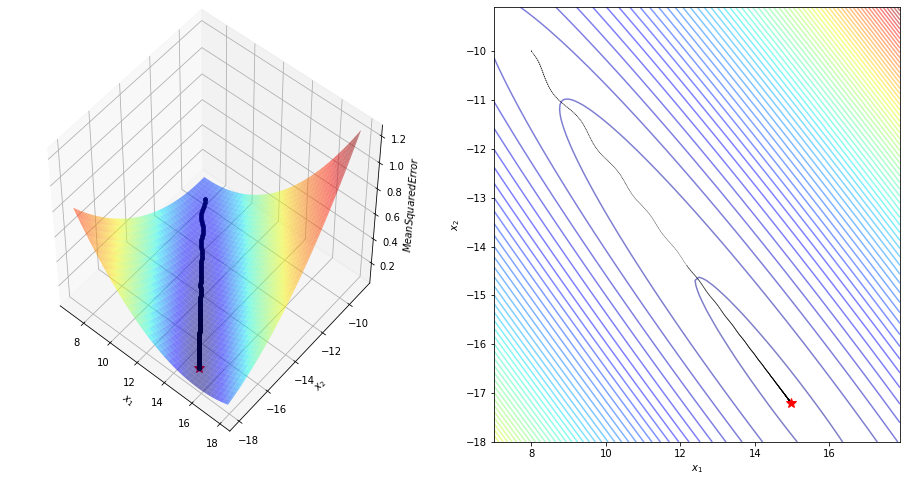

In [14]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AdaMax, learning_rate=0.01, 
                             momentum_type='nesterov', momentum=0.8, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=18, y_min=-18, y_max=-9)

epoch	iter	 cost		 gap		 rate
   0	   0	 1.6510e+01	 1.6249e+01			loss:  1.6510e+01 - r2:  0.0586
 100	 100	 1.3348e+00	 1.0746e+00	 6.6134e-02	loss:  1.3348e+00 - r2:  0.0586
 200	 200	 3.1537e-01	 5.5174e-02	 5.1341e-02	loss:  3.1537e-01 - r2:  0.0586
 300	 300	 2.6269e-01	 2.4879e-03	 4.5092e-02	loss:  2.6269e-01 - r2:  0.0586
 400	 400	 2.6029e-01	 8.9150e-05	 3.5834e-02	loss:  2.6029e-01 - r2:  0.0586
 500	 500	 2.6020e-01	 2.2174e-06	 2.4873e-02	loss:  2.6020e-01 - r2:  0.0586
 600	 600	 2.6020e-01	 3.3956e-08	 1.5314e-02	loss:  2.6020e-01 - r2:  0.0586
 700	 700	 2.6020e-01	 2.8478e-10	 8.3868e-03	loss:  2.6020e-01 - r2:  0.0586
 800	 800	 2.6020e-01	 1.1297e-12	 3.9669e-03	loss:  2.6020e-01 - r2:  0.0586
 900	 900	 2.6020e-01	 1.6653e-15	 1.4741e-03	loss:  2.6020e-01 - r2:  0.0586

[-0.1320119  -0.23377373]


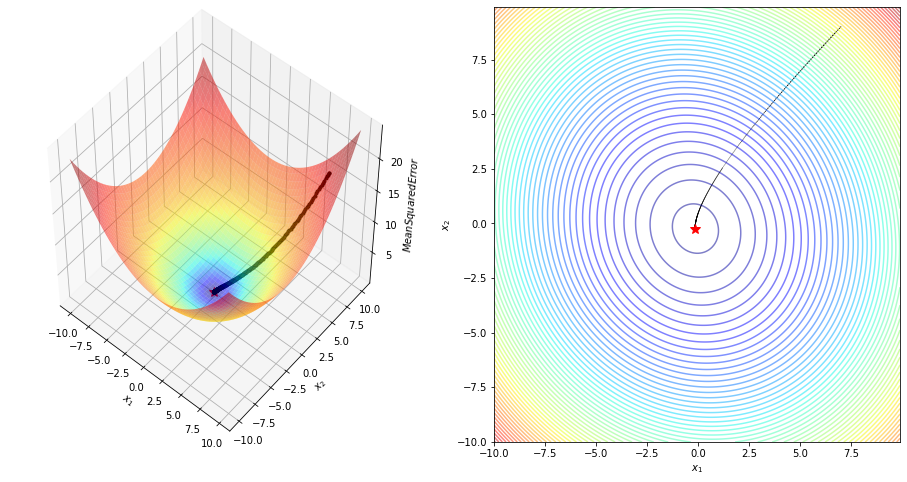

In [16]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AdaMax, learning_rate=0.1, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## AMSGrad

epoch	iter	 cost		 gap		 rate
   0	   0	 8.8196e-02	 3.2336e-02			loss:  8.8196e-02 - r2:  0.7921
 100	 100	 5.6002e-02	 1.4248e-04	 4.4064e-03	loss:  5.6002e-02 - r2:  0.7921
 200	 200	 5.5899e-02	 3.8942e-05	 2.7331e-01	loss:  5.5899e-02 - r2:  0.7921
 300	 300	 5.5866e-02	 6.3674e-06	 1.6351e-01	loss:  5.5866e-02 - r2:  0.7921
 400	 400	 5.5861e-02	 8.0413e-07	 1.2629e-01	loss:  5.5861e-02 - r2:  0.7921
 500	 500	 5.5860e-02	 8.9787e-08	 1.1166e-01	loss:  5.5860e-02 - r2:  0.7921
 600	 600	 5.5860e-02	 8.1908e-09	 9.1224e-02	loss:  5.5860e-02 - r2:  0.7921
 700	 700	 5.5860e-02	 4.9160e-10	 6.0018e-02	loss:  5.5860e-02 - r2:  0.7921
 800	 800	 5.5860e-02	 5.6073e-12	 1.1406e-02	loss:  5.5860e-02 - r2:  0.7921
 900	 900	 5.5860e-02	 3.9548e-12	 7.0530e-01	loss:  5.5860e-02 - r2:  0.7921

[ 14.97042516 -17.19470968]


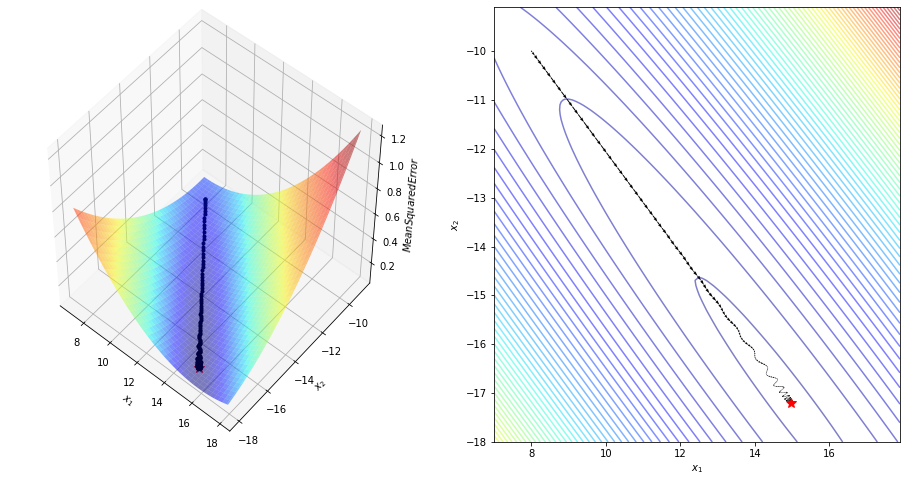

In [17]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AMSGrad, learning_rate=0.01, 
                             momentum_type='nesterov', momentum=0.6, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=18, y_min=-18, y_max=-9)

epoch	iter	 cost		 gap		 rate
   0	   0	 1.6510e+01	 1.6249e+01			loss:  1.6510e+01 - r2:  0.0586
 100	 100	 2.6047e-01	 2.7441e-04	 1.6887e-05	loss:  2.6047e-01 - r2:  0.0586
 200	 200	 2.6020e-01	 3.4647e-09	 1.2626e-05	loss:  2.6020e-01 - r2:  0.0586
 300	 300	 2.6020e-01	 7.3386e-14	 2.1181e-05	loss:  2.6020e-01 - r2:  0.0586
 400	 400	 2.6020e-01	 0.0000e+00	 0.0000e+00	loss:  2.6020e-01 - r2:  0.0586
 500	 500	 2.6020e-01	-5.5511e-17	-inf	loss:  2.6020e-01 - r2:  0.0586
 600	 600	 2.6020e-01	-1.1102e-16	 2.0000e+00	loss:  2.6020e-01 - r2:  0.0586
 700	 700	 2.6020e-01	-5.5511e-17	 5.0000e-01	loss:  2.6020e-01 - r2:  0.0586

/home/donato/donato.meoli.95@gmail.com/MachineLearning&ComputationalMathematics/optiml/optiml/opti/unconstrained/stochastic/amsgrad.py:49: RuntimeWarning: divide by zero encountered in double_scalars
  print('\t{: 1.4e}'.format((self.f_x - self.f.f_star()) / (prev_v - self.f.f_star())), end='')
/home/donato/donato.meoli.95@gmail.com/MachineLearning&ComputationalMathematics/optiml/optiml/opti/unconstrained/stochastic/amsgrad.py:49: RuntimeWarning: invalid value encountered in double_scalars
  print('\t{: 1.4e}'.format((self.f_x - self.f.f_star()) / (prev_v - self.f.f_star())), end='')



 800	 800	 2.6020e-01	 0.0000e+00	-0.0000e+00	loss:  2.6020e-01 - r2:  0.0586
 900	 900	 2.6020e-01	 0.0000e+00	 nan	loss:  2.6020e-01 - r2:  0.0586

[-0.1320119  -0.23377374]


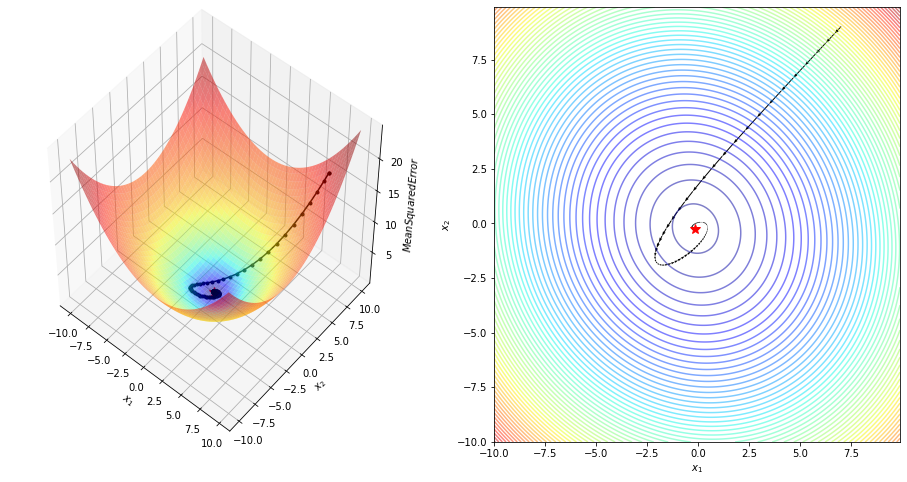

In [18]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AMSGrad, learning_rate=0.1, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## AdaDelta

In [19]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AdaDelta, learning_rate=0.8, 
                             momentum_type='nesterov', momentum=0.9, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=18, y_min=-18, y_max=-9)

epoch	iter	 cost		 gap		 rate
   0	   0	 8.8196e-02	 3.2336e-02			loss:  8.8196e-02 - r2:  0.7921
 100	 100	 5.5899e-02	 3.8873e-05	 1.2022e-03	loss:  5.5899e-02 - r2:  0.7921
 200	 200	 5.5861e-02	 1.0968e-06	 2.8215e-02	loss:  5.5861e-02 - r2:  0.7921
 300	 300	 5.5860e-02	 3.6350e-07	 3.3142e-01	loss:  5.5860e-02 - r2:  0.7921
 400	 400	 5.5860e-02	 1.2672e-07	 3.4861e-01	loss:  5.5860e-02 - r2:  0.7921
 500	 500	 5.5860e-02	 4.4193e-08	 3.4874e-01	loss:  5.5860e-02 - r2:  0.7921
 600	 600	 5.5860e-02	 1.5412e-08	 3.4875e-01	loss:  5.5860e-02 - r2:  0.7921
 700	 700	 5.5860e-02	 5.3750e-09	 3.4875e-01	loss:  5.5860e-02 - r2:  0.7921
 800	 800	 5.5860e-02	 1.8745e-09	 3.4875e-01	loss:  5.5860e-02 - r2:  0.7921
 900	 900	 5.5860e-02	 6.5374e-10	 3.4875e-01	loss:  5.5860e-02 - r2:  0.7921

[ 14.97108372 -17.19528847]


epoch	iter	 cost		 gap		 rate
   0	   0	 1.6510e+01	 1.6249e+01			loss:  1.6510e+01 - r2:  0.0586
 100	 100	 1.0066e+01	 9.8060e+00	 6.0347e-01	loss:  1.0066e+01 - r2:  0.0586
 200	 200	 6.5967e+00	 6.3365e+00	 6.4619e-01	loss:  6.5967e+00 - r2:  0.0586
 300	 300	 4.0668e+00	 3.8066e+00	 6.0074e-01	loss:  4.0668e+00 - r2:  0.0586
 400	 400	 2.2590e+00	 1.9988e+00	 5.2510e-01	loss:  2.2590e+00 - r2:  0.0586
 500	 500	 1.1092e+00	 8.4898e-01	 4.2474e-01	loss:  1.1092e+00 - r2:  0.0586
 600	 600	 5.2225e-01	 2.6205e-01	 3.0867e-01	loss:  5.2225e-01 - r2:  0.0586
 700	 700	 3.0182e-01	 4.1626e-02	 1.5885e-01	loss:  3.0182e-01 - r2:  0.0586
 800	 800	 2.6041e-01	 2.0972e-04	 5.0383e-03	loss:  2.6041e-01 - r2:  0.0586
 900	 900	 2.6020e-01	 3.2196e-15	 1.5352e-11	loss:  2.6020e-01 - r2:  0.0586

[-0.1320119  -0.23377374]


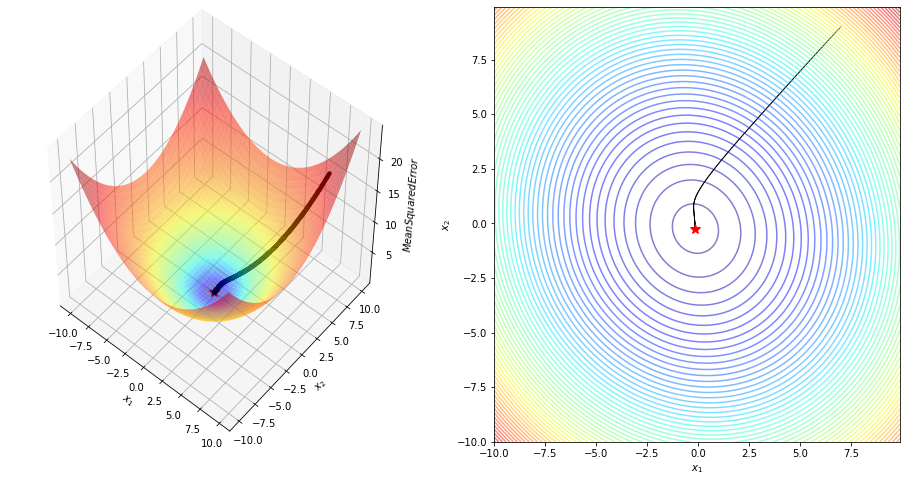

In [22]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=AdaDelta, learning_rate=0.8, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

## RProp

In [23]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=RProp, learning_rate=0.01, 
                             momentum_type='nesterov', momentum=0.5, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=18, y_min=-18, y_max=-9)

epoch	iter	 cost		 gap		 rate
   0	   0	 8.8196e-02	 3.2336e-02			loss:  8.8196e-02 - r2:  0.7921
 100	 100	 5.6641e-02	 7.8124e-04	 2.4160e-02	loss:  5.6641e-02 - r2:  0.7921
 200	 200	 5.5860e-02	 1.9674e-12	 2.5183e-09	loss:  5.5860e-02 - r2:  0.7921
 300	 300	 5.5860e-02	 3.2911e-13	 1.6729e-01	loss:  5.5860e-02 - r2:  0.7921
 400	 400	 5.5860e-02	 2.6242e-13	 7.9734e-01	loss:  5.5860e-02 - r2:  0.7921
 500	 500	 5.5860e-02	 2.0607e-13	 7.8529e-01	loss:  5.5860e-02 - r2:  0.7921
 600	 600	 5.5860e-02	 1.5400e-13	 7.4732e-01	loss:  5.5860e-02 - r2:  0.7921
 700	 700	 5.5860e-02	 1.1227e-13	 7.2903e-01	loss:  5.5860e-02 - r2:  0.7921
 800	 800	 5.5860e-02	 7.4843e-14	 6.6663e-01	loss:  5.5860e-02 - r2:  0.7921
 900	 900	 5.5860e-02	 4.7740e-14	 6.3786e-01	loss:  5.5860e-02 - r2:  0.7921

[ 14.97048663 -17.19469211]


In [25]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=RProp, learning_rate=0.1, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

epoch	iter	 cost		 gap		 rate
   0	   0	 1.6510e+01	 1.6249e+01			loss:  1.6510e+01 - r2:  0.0586
 100	 100	 2.6020e-01	 7.3414e-09	 4.5180e-10	loss:  2.6020e-01 - r2:  0.0586
 200	 200	 2.6020e-01	 1.6098e-14	 2.1928e-06	loss:  2.6020e-01 - r2:  0.0586
 300	 300	 2.6020e-01	 1.6098e-14	 1.0000e+00	loss:  2.6020e-01 - r2:  0.0586
 400	 400	 2.6020e-01	 1.6098e-14	 1.0000e+00	loss:  2.6020e-01 - r2:  0.0586
 500	 500	 2.6020e-01	 1.6098e-14	 1.0000e+00	loss:  2.6020e-01 - r2:  0.0586
 600	 600	 2.6020e-01	 1.6098e-14	 1.0000e+00	loss:  2.6020e-01 - r2:  0.0586
 700	 700	 2.6020e-01	 1.6098e-14	 1.0000e+00	loss:  2.6020e-01 - r2:  0.0586
 800	 800	 2.6020e-01	 1.6098e-14	 1.0000e+00	loss:  2.6020e-01 - r2:  0.0586
 900	 900	 2.6020e-01	 1.6098e-14	 1.0000e+00	loss:  2.6020e-01 - r2:  0.0586

[-0.13201127 -0.2337728 ]


## RMSProp

In [26]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[8, -10], fit_intercept=False),),
                             loss=mean_squared_error, optimizer=RMSProp, learning_rate=0.01, 
                             momentum_type='nesterov', momentum=0.6, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=7, x_max=18, y_min=-18, y_max=-9)

epoch	iter	 cost		 gap		 rate
   0	   0	 8.8196e-02	 3.2336e-02			loss:  8.8196e-02 - r2:  0.7921
 100	 100	 8.4681e-02	 2.8822e-02	 8.9132e-01	loss:  8.4681e-02 - r2:  0.7921
 200	 200	 6.8513e-02	 1.2653e-02	 4.3902e-01	loss:  6.8513e-02 - r2:  0.7921
 300	 300	 5.8758e-02	 2.8987e-03	 2.2908e-01	loss:  5.8758e-02 - r2:  0.7921
 400	 400	 5.5875e-02	 1.4953e-05	 5.1584e-03	loss:  5.5875e-02 - r2:  0.7921
 500	 500	 5.5860e-02	 3.3811e-07	 2.2612e-02	loss:  5.5860e-02 - r2:  0.7921
 600	 600	 5.5860e-02	 3.8816e-07	 1.1481e+00	loss:  5.5860e-02 - r2:  0.7921
 700	 700	 5.5860e-02	 3.8893e-07	 1.0020e+00	loss:  5.5860e-02 - r2:  0.7921
 800	 800	 5.5860e-02	 3.8893e-07	 1.0000e+00	loss:  5.5860e-02 - r2:  0.7921
 900	 900	 5.5860e-02	 3.8893e-07	 1.0000e+00	loss:  5.5860e-02 - r2:  0.7921

[ 14.96733359 -17.19783356]


In [27]:
net = NeuralNetworkRegressor((FullyConnected(2, 1, linear, coef_init=[7, 9], coef_reg=L2(lmbda), fit_intercept=False),),
                             loss=mean_squared_error, optimizer=RMSProp, learning_rate=0.1, verbose=100).fit(X, y)
print(net.coefs_[0].ravel())
plot_trajectory_optimization(net.loss, net.optimizer, x_min=-10, x_max=10, y_min=-10, y_max=10)

epoch	iter	 cost		 gap		 rate
   0	   0	 1.6510e+01	 1.6249e+01			loss:  1.6510e+01 - r2:  0.0586
 100	 100	 3.1600e-01	 5.5804e-02	 3.4342e-03	loss:  3.1600e-01 - r2:  0.0586
 200	 200	 2.6041e-01	 2.1525e-04	 3.8572e-03	loss:  2.6041e-01 - r2:  0.0586
 300	 300	 2.6080e-01	 5.9953e-04	 2.7853e+00	loss:  2.6080e-01 - r2:  0.0586
 400	 400	 2.6080e-01	 5.9981e-04	 1.0005e+00	loss:  2.6080e-01 - r2:  0.0586
 500	 500	 2.6080e-01	 5.9980e-04	 9.9997e-01	loss:  2.6080e-01 - r2:  0.0586
 600	 600	 2.6080e-01	 5.9980e-04	 1.0000e+00	loss:  2.6080e-01 - r2:  0.0586
 700	 700	 2.6080e-01	 5.9980e-04	 1.0000e+00	loss:  2.6080e-01 - r2:  0.0586
 800	 800	 2.6080e-01	 5.9980e-04	 1.0000e+00	loss:  2.6080e-01 - r2:  0.0586
 900	 900	 2.6080e-01	 5.9980e-04	 1.0000e+00	loss:  2.6080e-01 - r2:  0.0586

[-0.1820699  -0.28383174]
